In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

def to_img(x):
    return x.transpose(1, 2, 0)

def normalize(x):
    x = x - x.min()
    x = x / x.max()
    return x

In [2]:
import numpy as np
import cupy as cp
import chainer.functions as F

from chainer.datasets import get_mnist, get_cifar10
from chainer import iterators
from chainer.dataset import concat_examples
from chainer.backends.cuda import to_cpu
from chainer import serializers


# Training settings
env = 'cifar10'
gpu_id = 0

# data
if env == 'mnist':
    train_data, test_data = get_mnist(withlabel=True, ndim=3)
    shape = (1, 28, 28)
elif env == 'cifar10':
    train_data, test_data = get_cifar10(withlabel=True, ndim=3)
    shape = (3, 32, 32)
train_iter = iterators.MultiprocessIterator(train_data, 1, repeat=False, shuffle=True)

# model
from embedding.ae import AE
model = AE(size=shape[-2:], in_channels=shape[0])
serializers.load_npz('./res/' + env + '.model', model)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


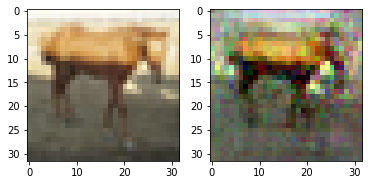

In [3]:
idx = 2000

plt.subplot(1, 2, 1)
data = train_data[idx][0]
plt.imshow(to_img(data))

plt.subplot(1, 2, 2)
output = model(np.expand_dims(data, 0))
plt.imshow(to_img(output.array.squeeze(0)))

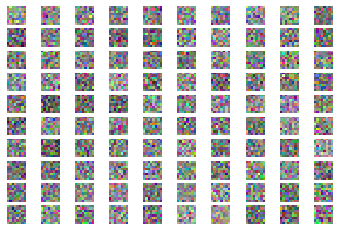

In [7]:
n = model.conv1.W.shape[0]

for i in range(100):
    rf = model.conv1.W[i]
    plt.subplot(10, 10, i+1)
    plt.imshow(normalize(to_img(rf.array)))
    plt.axis('off')